# Lets plot the pump consumption

In [239]:
import pandas as pd

In [240]:
specific_date = "2024-08-08"


In [241]:
def replace_vertical_line_with_comma(input_file, output_file):
    with open(input_file, 'r') as infile:
        lines = infile.readlines()

    # Replace vertical line '|' with comma ',' in each line
    modified_lines = [line.replace('|', ',') for line in lines]

    # Write the modified content to the output file
    with open(output_file, 'w') as outfile:
        outfile.writelines(modified_lines)

    print(f"File saved as {output_file}")

# Example usage:
input_file = "data/Vatnsendi_Rjupnasalir_pumpPower.csv"  # Path to the input CSV file
output_file = 'Vatnsendi_rjupnasalir_pumppower_modfied.csv'  # Path for the output CSV file

#replace_vertical_line_with_comma(input_file, output_file)


In [242]:


def extract_columns_to_dataframe(input_file):
    # Read the CSV file into a DataFrame
    df = pd.read_csv(input_file)
    
    # Extract only the required columns: mpoint_id, start_time, and value
    df_filtered = df[['mpoint_id', 'start_time', 'value']]
    
    # Convert 'value' column to numeric (if necessary), handling errors (e.g., converting 'NULL' to NaN)
    df_filtered['value'] = pd.to_numeric(df_filtered['value'], errors='coerce')
    
    return df_filtered

# Example usage:
input_file = 'Vatnsendi_rjupnasalir_pumppower_modfied.csv'  # Path to the CSV file

# Extract the columns into a DataFrame
df_result = extract_columns_to_dataframe(input_file)

df_result = df_result.copy()
# Display the DataFrame
print(df_result)


                mpoint_id           start_time      value
0       H-KOP-VE-DÆ222-PS  2022-01-14 20:00:00   0.000000
1       H-KOP-VE-DÆ222-PS  2022-01-14 10:00:00   0.000000
2       H-KOP-VE-DÆ222-PS  2022-01-14 02:00:00   0.000000
3       H-KOP-VE-DÆ222-PS  2022-01-15 15:00:00   0.000000
4       H-KOP-VE-DÆ222-PS  2022-01-18 17:00:00   0.000000
...                   ...                  ...        ...
167040  H-KOP-RS-DÆ211-PS  2025-03-05 21:00:00  10.791466
167041  H-KOP-RS-DÆ212-PS  2025-03-05 21:00:00  29.629678
167042  H-KOP-RS-DÆ222-PS  2025-03-05 21:00:00  30.687266
167043  H-KOP-VE-DÆ212-PS  2025-03-05 21:00:00  26.769442
167044  H-KOP-VE-DÆ213-PS  2025-03-05 21:00:00  12.254310

[167045 rows x 3 columns]


C:\Users\frodi\AppData\Local\Temp\ipykernel_17148\1838809404.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['value'] = pd.to_numeric(df_filtered['value'], errors='coerce')


In [243]:
import pandas as pd

# List of mpoint_id values for the pumps you're interested in
mpoint_ids = [
    'H-KOP-RS-DÆ212-PS', 
    'H-KOP-RS-DÆ222-PS', 
    'H-KOP-VE-DÆ212-PS', 
    'H-KOP-VE-DÆ213-PS', 
    'H-KOP-VE-DÆ222-PS'
]

# Filter the DataFrame for the specified mpoint_ids
df_filtered = df_result[df_result['mpoint_id'].isin(mpoint_ids)]

# Group by 'mpoint_id' and create a DataFrame for each unique 'mpoint_id'
for mpoint_id in mpoint_ids:
    # Filter out the group for each pump
    pump_df = df_filtered[df_filtered['mpoint_id'] == mpoint_id]
    
    # Create a DataFrame for the pump
    globals()[mpoint_id] = pump_df.drop(columns=['mpoint_id'])
    
    # Print the first few rows of the DataFrame for each pump
    print(f"First 5 rows for {mpoint_id}:")
    print(globals()[mpoint_id].head(), "\n")


First 5 rows for H-KOP-RS-DÆ212-PS:
              start_time      value
107  2022-01-20 01:00:00  27.688774
110  2022-01-18 00:00:00  26.059087
117  2022-01-17 23:00:00  26.524099
122  2022-01-17 10:00:00  27.454215
124  2022-01-20 03:00:00  27.210804 

First 5 rows for H-KOP-RS-DÆ222-PS:
              start_time      value
106  2022-01-20 01:00:00  28.814466
109  2022-01-18 00:00:00  27.455319
116  2022-01-17 23:00:00  27.775894
121  2022-01-17 10:00:00  28.598854
128  2022-01-20 03:00:00  28.323745 

First 5 rows for H-KOP-VE-DÆ212-PS:
              start_time      value
105  2022-01-20 01:00:00  17.956547
113  2022-01-18 00:00:00  18.728881
114  2022-01-17 23:00:00  18.819518
120  2022-01-17 10:00:00  18.146222
127  2022-01-20 03:00:00  17.805807 

First 5 rows for H-KOP-VE-DÆ213-PS:
              start_time     value
104  2022-01-20 01:00:00  4.930189
112  2022-01-18 00:00:00  5.802123
118  2022-01-17 23:00:00  5.567270
119  2022-01-17 10:00:00  5.123600
126  2022-01-20 03:00:00  5

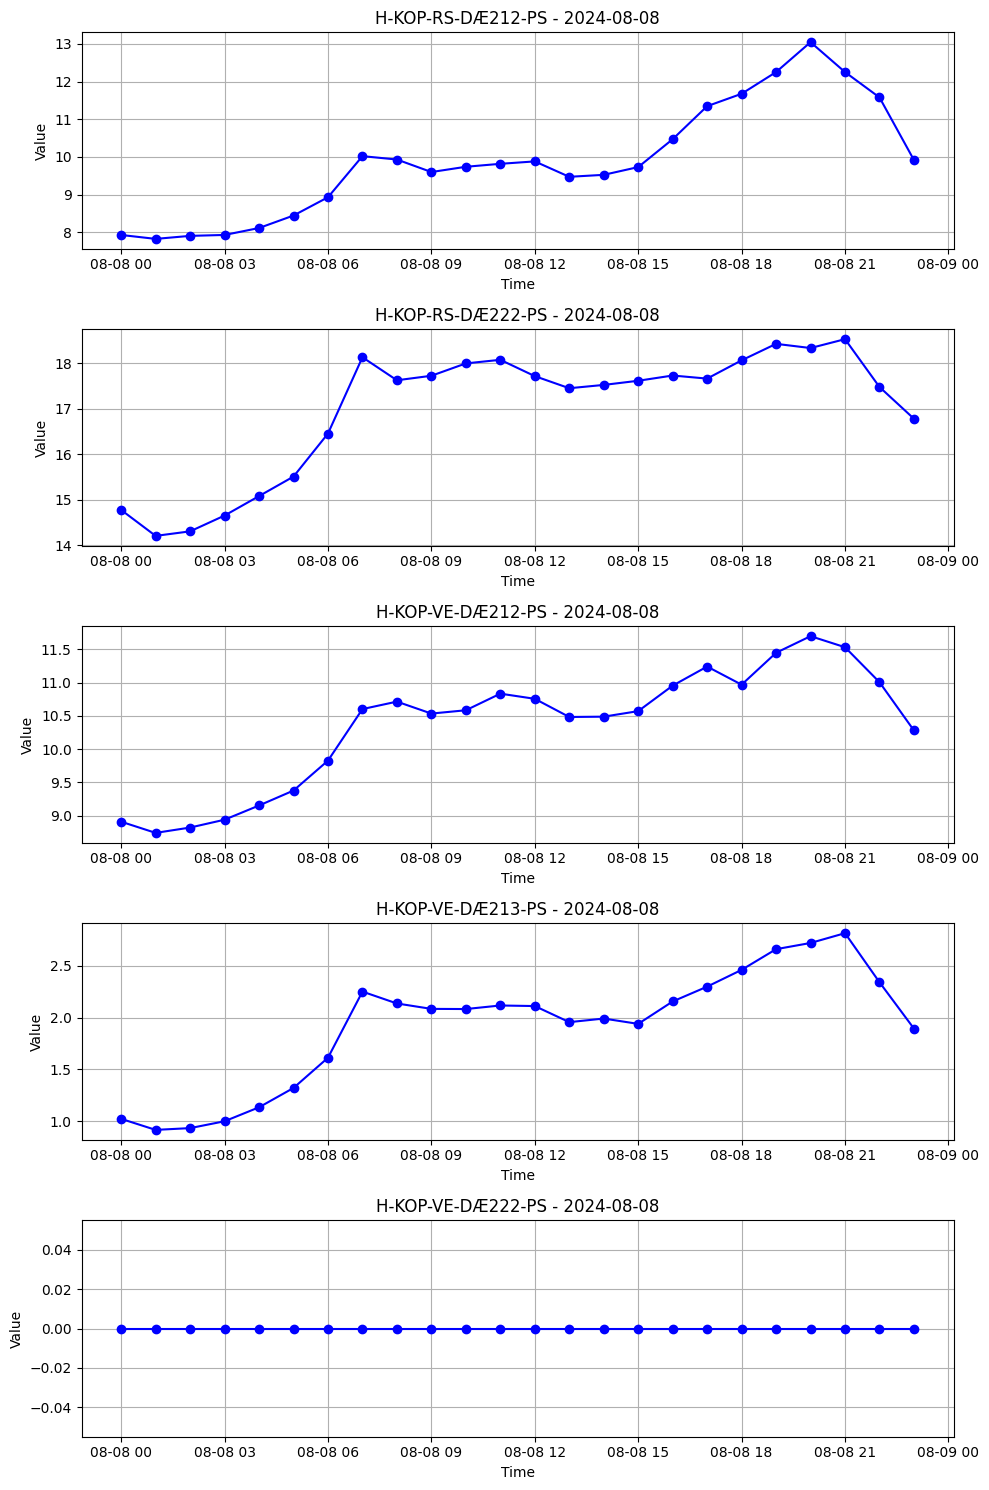

In [244]:
import pandas as pd
import matplotlib.pyplot as plt

# List of mpoint_id values for the pumps you're interested in
mpoint_ids = [
    'H-KOP-RS-DÆ212-PS', 
    'H-KOP-RS-DÆ222-PS', 
    'H-KOP-VE-DÆ212-PS', 
    'H-KOP-VE-DÆ213-PS', 
    'H-KOP-VE-DÆ222-PS'
]

# Specify the date you want to filter by (e.g., '2024-11-03')
# specific_date = "2024-11-09"
# specific_date = "2024-08-08"


# Filter the DataFrame for the specified mpoint_ids
df_filtered = df_result[df_result['mpoint_id'].isin(mpoint_ids)]

# Create a figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Group by 'mpoint_id' and create a DataFrame for each unique 'mpoint_id'
for idx, mpoint_id in enumerate(mpoint_ids):
    # Filter out the group for each pump
    pump_df = df_filtered[df_filtered['mpoint_id'] == mpoint_id].copy()
    
    # Convert 'start_time' to datetime if not already
    pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])
    
    # Sort the DataFrame by 'start_time' in ascending order
    pump_df_sorted = pump_df.sort_values(by='start_time', ascending=True)
    
    # Filter the DataFrame for the specific day
    pump_df_filtered = pump_df_sorted[pump_df_sorted['start_time'].dt.date == pd.to_datetime(specific_date).date()]
    
    # Create a DataFrame for the pump
    globals()[mpoint_id] = pump_df_filtered.drop(columns=['mpoint_id'])
    
    # Plot the 'value' against 'start_time' for the specific day
    axes[idx].plot(globals()[mpoint_id]['start_time'], globals()[mpoint_id]['value'], marker='o', linestyle='-', color='b')
    axes[idx].set_title(f"{mpoint_id} - {specific_date}")
    axes[idx].set_xlabel("Time")
    axes[idx].set_ylabel("Value")
    axes[idx].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Convert start_time to datetime safely
df_filtered = df_filtered.copy()
df_filtered['start_time'] = pd.to_datetime(df_filtered['start_time'])

# Now filter and export only the two pumps
target_pumps = ['H-KOP-VE-DÆ213-PS']

df_export = df_filtered[
    (df_filtered['mpoint_id'].isin(target_pumps)) &
    (df_filtered['start_time'].dt.date == pd.to_datetime(specific_date).date())
]

# Sort and export to CSV
df_export = df_export.sort_values(by=['mpoint_id', 'start_time'])
df_export.to_csv("rjupnasalir_two_pumps.csv", index=False)



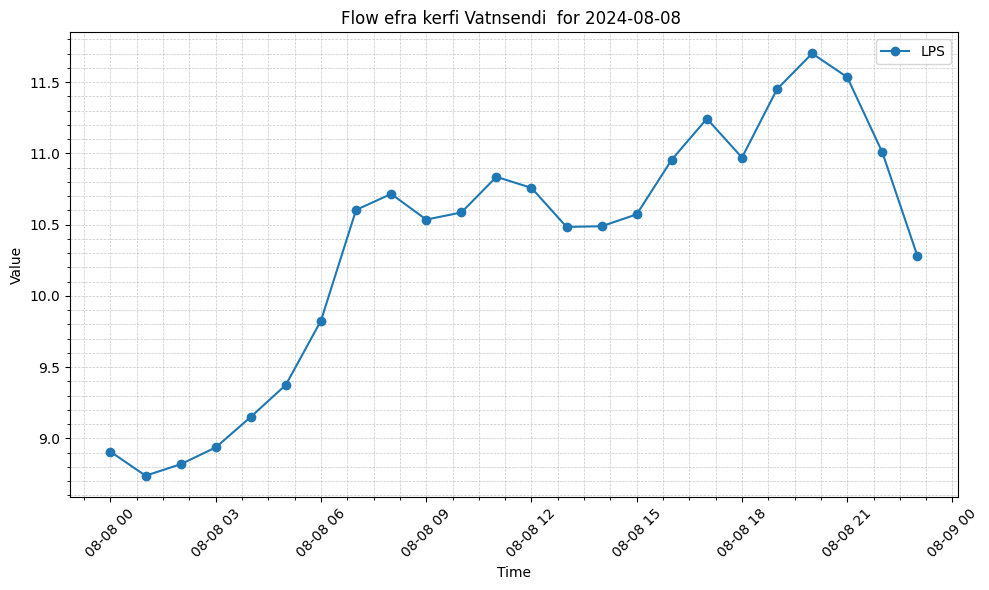

In [245]:


plt.figure(figsize=(10, 6))
plt.plot(globals()["H-KOP-VE-DÆ212-PS"]["start_time"],globals()["H-KOP-VE-DÆ212-PS"]["value"], label='LPS', color='tab:blue', marker='o' )


# Customize the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title(f'Flow efra kerfi Vatnsendi  for {specific_date} ')
plt.xticks(rotation=45)

# Enable minor ticks for finer grid resolution
plt.minorticks_on()

# Apply finer grid resolution
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add a legend
plt.legend()

# Optimize layout
plt.tight_layout()

# Show the plot
plt.show()

In [246]:
specific_date

'2024-08-08'

C:\Users\frodi\AppData\Local\Temp\ipykernel_17148\1801789008.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


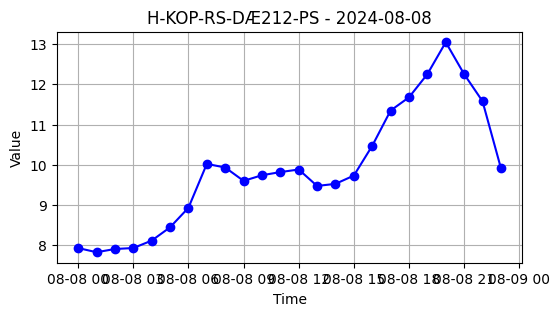

C:\Users\frodi\AppData\Local\Temp\ipykernel_17148\1801789008.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


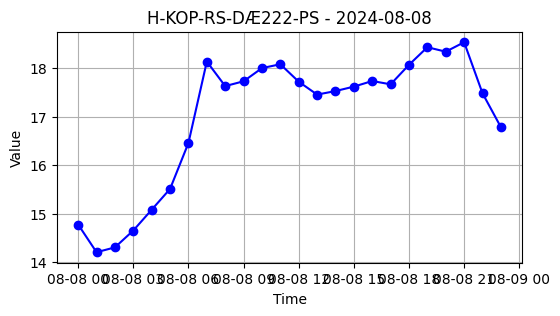

C:\Users\frodi\AppData\Local\Temp\ipykernel_17148\1801789008.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


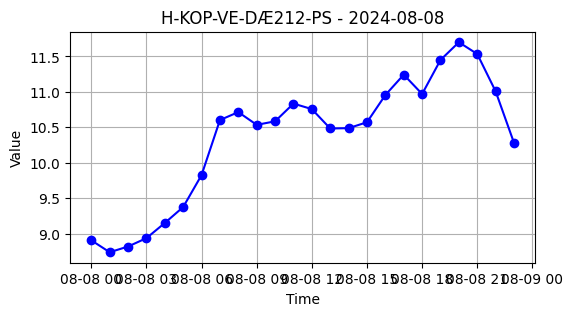

C:\Users\frodi\AppData\Local\Temp\ipykernel_17148\1801789008.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


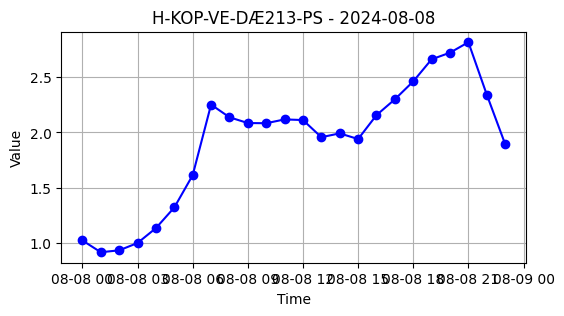

C:\Users\frodi\AppData\Local\Temp\ipykernel_17148\1801789008.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])


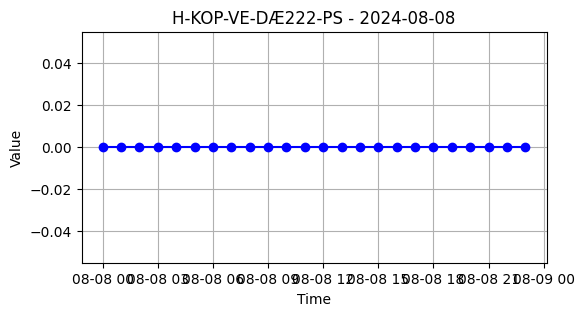

In [247]:
import pandas as pd
import matplotlib.pyplot as plt

# List of mpoint_id values for the pumps you're interested in
mpoint_ids = [
    'H-KOP-RS-DÆ212-PS', 
    'H-KOP-RS-DÆ222-PS', 
    'H-KOP-VE-DÆ212-PS', 
    'H-KOP-VE-DÆ213-PS', 
    'H-KOP-VE-DÆ222-PS'
]

# Specify the date you want to filter by (e.g., '2024-11-03')


# Filter the DataFrame for the specified mpoint_ids
df_filtered = df_result[df_result['mpoint_id'].isin(mpoint_ids)]

# Create separate plots for each pump
for mpoint_id in mpoint_ids:
    # Filter out the group for each pump
    pump_df = df_filtered[df_filtered['mpoint_id'] == mpoint_id]
    
    # Convert 'start_time' to datetime if not already
    pump_df['start_time'] = pd.to_datetime(pump_df['start_time'])
    
    # Sort the DataFrame by 'start_time' in ascending order
    pump_df_sorted = pump_df.sort_values(by='start_time', ascending=True)
    
    # Filter the DataFrame for the specific day
    pump_df_filtered = pump_df_sorted[pump_df_sorted['start_time'].dt.date == pd.to_datetime(specific_date).date()]
    
    # Create a DataFrame for the pump
    globals()[mpoint_id] = pump_df_filtered.drop(columns=['mpoint_id'])
    
    # Create a new figure with the specified size (6,3)
    plt.figure(figsize=(6, 3))
    
    # Plot the 'value' against 'start_time' for the specific day
    plt.plot(globals()[mpoint_id]['start_time'], globals()[mpoint_id]['value'], marker='o', linestyle='-', color='b')
    
    # Set plot labels and title
    plt.title(f"{mpoint_id} - {specific_date}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)
    
    # Show the plot
    plt.show()
